<a href="https://colab.research.google.com/github/Yu-Hayung/Python-Machine-Learning-and-Deep-Learning/blob/main/7_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%9C%EC%9E%91(%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 시작 

## 인공 신경망 

## MNIST


In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


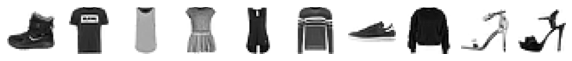

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize =(10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap = 'gray_r')
  axs[i].axis('off')
plt.show()

In [5]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [6]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류 하기 

In [7]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [8]:
print(train_scaled.shape)

(60000, 784)


In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs= -1)
print(np.mean(scores['test_score']))

0.8195666666666668


In [10]:
sc = SGDClassifier(loss='log', max_iter=9, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs= -1)
print(np.mean(scores['test_score']))

0.8303833333333334


In [11]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs= -1)
print(np.mean(scores['test_score']))

0.8313333333333333


In [12]:
sc = SGDClassifier(loss='log', max_iter=20, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs= -1)
print(np.mean(scores['test_score']))

0.8436999999999999


## 인공 신경망 

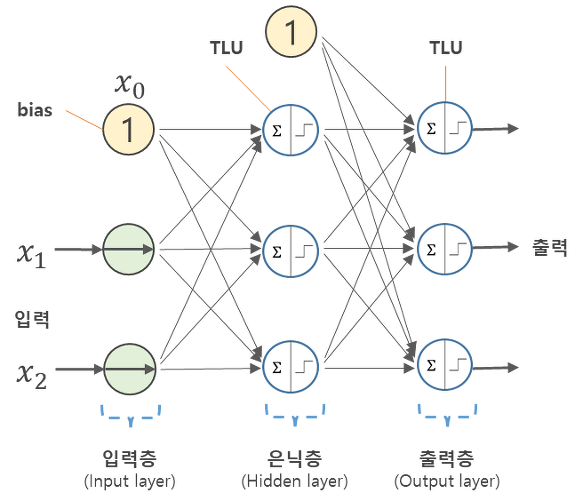

# 텐서플로와 케라스 

텐서플로는 구글이 2015 / 11 공개한 딥러닝 라이브러리 이다. 

2016 / 3 알파고가 이세돌 9단을 이켜 대중에 알려지면서 폭발적인 인기가 높아짐 

케라스는  텐서플로의 고수준 API 이다.

In [13]:
import tensorflow as tf

from tensorflow import keras

## 인공신경망으로 모델 만들기 

In [14]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

# test_size=0.2 = 20% 검증 세트 

In [15]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [16]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [17]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,)) 

# 뉴런개수 = 10, 뉴런의 출력에 적용할 함수, 입력의 크기 

In [18]:
model = keras.Sequential(dense)

## 인공신경망으로 패션 아이템 분류하기 

In [19]:
model.compile(loss ='sparse_categorical_crossentropy', metrics='accuracy')

이진 분류 : loss = 'binary_crossentropy'
다중 분류 : loss = 'categorical_crossentropy'

- 이진 크로스 엔트로피 손실을 위해 -log(예측 확률)에 타깃값(정답)을 곱해 진행

이진 분류의 타깃값은 양성 샘플일 경우에는 1, 음성샘플일 경우에는 0으로 된다. 0을 곱하면 어떤 계산이든 모두 0이 되기 때문에 특별히 음성 샘플일 경우 1로 바뀌어 (1-타깃값) 계산한다. 


In [20]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [21]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6036 - accuracy: 0.7939
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4797 - accuracy: 0.8394
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4562 - accuracy: 0.8485
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4451 - accuracy: 0.8516
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4371 - accuracy: 0.8544


케라스는 에포크마다 걸린 시간과 손실 (loss), 정확도(accuracy)출력한다. 
케라스 모델의 성능을 평가하는 메서드 = evaluate() 메서드 이다. 

In [22]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4666 - accuracy: 0.8415


[0.46662235260009766, 0.8414999842643738]

## 심층 신경망 

In [23]:
# API를 사용해 MNIST 데이터셋 불러오기 

from tensorflow import keras
(train_input, train_target),(test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

In [24]:
from sklearn.model_selection import train_test_split


train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)


train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42)

### 인공 신경망 모델 2개 추가 

출력층에 적용할 수 있는 활성화 함수 종류는 제한되어 있다. 
이진분류일 경우 시그모이드 함수 사용, 다중 분류일 경우 소프트맥스 함수 사용 

은닉층은 활성화 함수는 비교적 자유롭다. 
대표적으로 시그모이드 함수와 렐루 함수등을 적용할 수 있다. 

In [25]:
# 인공 신경망 모델 2개 추가 

dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

## 심층 신경망 만들기 

In [26]:
model = keras.Sequential([dense1, dense2])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


첫줄 모델이름 <br>
모델에 들어 있는 층이 순서대로 나열 이 순서는 맨 처음 추가한 은닉층에서 출력층의 순서대로 나열 

층마다 층 이름, 클래스, 출력크기, 모델 파라미터 개수가 출력된다.<br>
층을 만들때 name 매개변수로 이름을 지정할 수 있다. (기본값 'dense'로 붙여짐)

---

출력 값을 풀어보자 

출력크기 = (Nome, 100) : 차원은 샘플의 개수를 나타낸다. 샘플 개수가 아직 정의 되지 않아 None 이다.<br>
케라스 모델의 fit() 메서드에 훈련데이터를 주입하면 이 데이터를 한번에 모두 사용하지 않고 잘게 나누어 여러번에 걸쳐 경사 하강법 단계를 수행하기 때문 = **미니배치 경사 하강법** 

케라스의 기본 미니배치의 크기는 32개 기본값
fit() 메서드 에서 barch_size 매개 변수로 바꿀 수 있음 
= 따라서 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 None을 설정한다. 

이렇게 신경망 층에 입력되거나 출력되는 배열의 첫 번째 차원을 배치 차원이라고 부른다. 

Trainable params: 79,510 총 모델 파라미터 개수와 훈련되는 파라미터 개수가 동일하게 79,510개 나온다. 은닉층과 출력층의 파라미터 개수를 합친값 

Non-trainable params: 0 은 간혹 경사 하강법으로 훈련되지 않은 파라미터를 가진 층

## 층을 추가하는 방법 

In [27]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,),
                       name= 'hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
    ], name='패션 MNIST 모델')

In [28]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [29]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5640 - accuracy: 0.8084
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4066 - accuracy: 0.8542
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3714 - accuracy: 0.8665
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3479 - accuracy: 0.8737
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3312 - accuracy: 0.8797


# 렐루 함수 

In [32]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [34]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42)

In [35]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5305 - accuracy: 0.8150
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3899 - accuracy: 0.8595
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3518 - accuracy: 0.8735
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3345 - accuracy: 0.8794
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3201 - accuracy: 0.8853


In [36]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3503 - accuracy: 0.8798


[0.35029149055480957, 0.8798333406448364]

## 옵티 마이저

하이퍼파라디터는 모델이 학습하지 않아 사람이 지정해 주어야 하는 파라미터이다. <br>
신경망에는 특히 하이퍼파라미터가 많다. <br>
**(활성화 함수도 선택해야 할 하이퍼파라미터 중 하나이다.)**


케라스의 기본 경사 하강법 알고리즘인 RMSprop을 사용했다. <br>
케라스는 다양한 종류의 경사 하강법 알고리즘을 제공한다. 이들을 옵티마이저 라고 부른다. 

= RMSprop 의 학습룰 또한 조정할 하이퍼파라미터 중 하나이다. 


In [37]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5236 - accuracy: 0.8177
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3900 - accuracy: 0.8592
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3511 - accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3253 - accuracy: 0.8813
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3074 - accuracy: 0.8863


In [39]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3491 - accuracy: 0.8728


[0.34909549355506897, 0.8728333115577698]

# 신경망 모델 훈련 

## 손실 곡선 

In [40]:
from tensorflow import keras
from sklearn.model_selection import train_test_split


(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size= 0.2, random_state=42)

In [41]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [42]:
model = model_fn()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [44]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


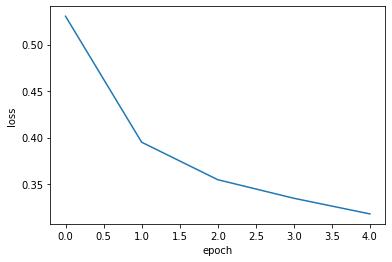

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

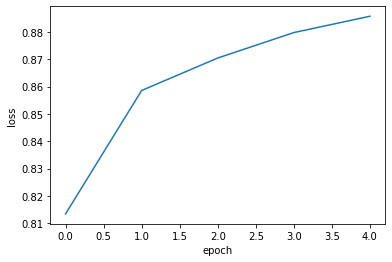

In [46]:

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [47]:
model = model_fn()

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [48]:
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

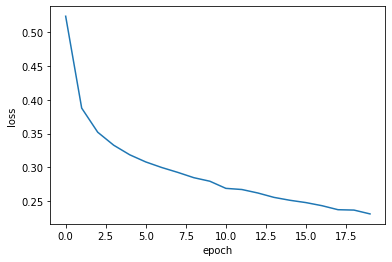

In [49]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [50]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [51]:
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [52]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


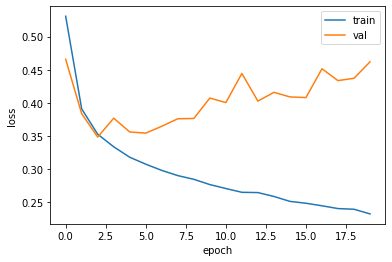

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

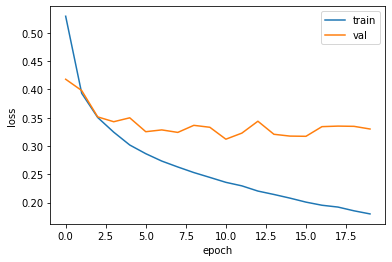

In [54]:
model = model_fn()

model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data =(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## 드롭아웃 

훈련과정중에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는다.


In [55]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


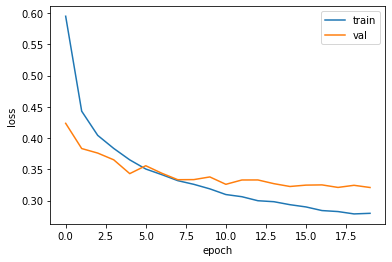

In [57]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy', metrics = 'accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()


과대 적합이 줄어들었음을 볼 수 있음 

## 모델 저장과 복원 

In [58]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [59]:
model.save_weights('model-weights.h5')

In [60]:
model.save('model-whole.h5')

In [61]:
!ls -al *.h5

-rw-r--r-- 1 root root 332480 Jun  7 11:31 model-weights.h5
-rw-r--r-- 1 root root 981736 Jun  7 11:32 model-whole.h5


> 1. 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용한다. 
2. 아예 model-whole.h5 파일에서 새로운 모델을 만들어 바로 사용한다. 

In [62]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [63]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8816666666666667


In [64]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3272 - accuracy: 0.8817


[0.32722359895706177, 0.8816666603088379]

## 콜백

In [65]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

모델이 훈련한 후에 best-model.h5 최상의 검증 점수를 낸 모델이 저장된다. 
이 모델을 load_model() 함수로 다시 읽어서 예측을 수행한다. 

In [66]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3314 - accuracy: 0.8846


[0.3313649594783783, 0.8845833539962769]

과대 적합이 되기전에 훈련을 중지하는 것 = 조기 종료

In [70]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [71]:
print(early_stopping_cb.stopped_epoch)

0


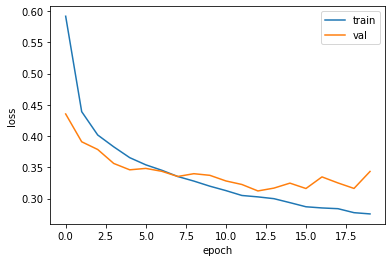

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()



In [73]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3435 - accuracy: 0.8788


[0.34350207448005676, 0.8787500262260437]